# Bar grafieken (Verticaal staafdiagram)
Een kolomgrafiek gebruik je voornamelijk om numerieke waarden te vergelijken tussen verschillende categorieën. Een kolomgrafiek is het duidelijkst als het aantal categorieën klein is. 

Twee uitbreidingen zijn het horizontale staafdiagram (vooral handig bij langere namen van de categorieën) en het gestapelde staafdiagram. Die laatste gebruik je om aan te tonen hoe individuele onderdelen bijdragen aan het geheel. De onderdelen kunnen in absolute waarden worden weergegeven of procentueel

## Download de data
We zullen werken met de Titanic gegevensset die we eerst downloaden

In [1]:
from pathlib import Path
from zipfile import ZipFile
import requests
URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()


## Data verkennen
Alhoewel we die dataset al kennen, gaan we die eerst toch nog eens verkennen

In [2]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Omdat we met categorieën gaan werken, kunnen ook de tekstkolommen interessant zijn

In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Businessvraag
Vergelijk de overlevingskansen van de passagiers op basis van geslacht en klasse. We hebben de volgende kolommen nodig: Survived en Sex. Van Sex kunnen we een categorie maken. We zien dat er geen ontbrekende waarden zijn.

In [5]:
df = pd.read_csv(TITANIC_CSV, usecols=['Survived', 'Sex'], dtype={'Survived':pd.BooleanDtype(), 'Sex':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Sex       891 non-null    category
dtypes: boolean(1), category(1)
memory usage: 2.9 KB


## Klaarmaken van de gegevens
Hoeveel mannen hebben de ramp overleefd? Hoeveel vrouwen hebben de ramp overleefd?

In [11]:
mannen_overleefd = df.loc[df.Sex == 'male', 'Survived'].values.sum()
vrouwen_overleefd = df.loc[df.Sex == 'female', 'Survived'].values.sum()
mannen_overleefd, vrouwen_overleefd 


(np.int64(109), np.int64(233))

## Plot de gegevens

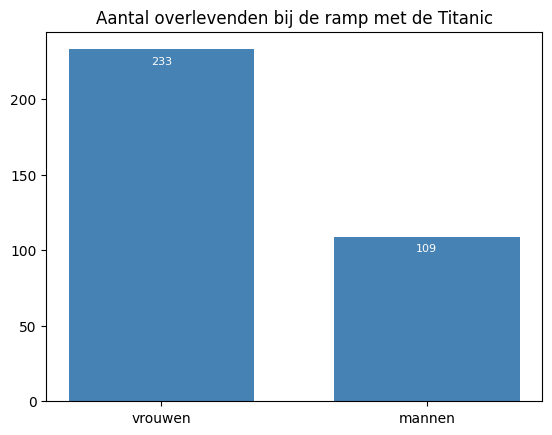

In [43]:
import matplotlib.pyplot as plt

plt.bar(['vrouwen', 'mannen'], [vrouwen_overleefd, mannen_overleefd], width=0.7, color='steelblue')
plt.title('Aantal overlevenden bij de ramp met de Titanic')
plt.text(0, vrouwen_overleefd - 10, vrouwen_overleefd, ha="center", color="#FFF", fontsize=8)
plt.text(1, mannen_overleefd - 10, mannen_overleefd, ha="center", color="#FFF", fontsize=8)
plt.show()

## meerdere subplots per klasse

In [45]:
df = pd.read_csv(TITANIC_CSV, usecols=['Survived', 'Sex', 'Pclass'], dtype={'Survived':pd.BooleanDtype(), 'Sex':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
dtypes: boolean(1), category(1), int64(1)
memory usage: 9.8 KB


In [46]:
mannen_overleefd = [0] * 3
vrouwen_overleefd = [0] * 3
for klasse in range(1, 4):
    mannen_overleefd[klasse - 1] = df.loc[(df.Sex == 'male') & (df.Pclass == klasse), 'Survived'].values.sum()
    vrouwen_overleefd[klasse - 1] = df.loc[(df.Sex == 'female') & (df.Pclass == klasse), 'Survived'].values.sum()
mannen_overleefd, vrouwen_overleefd

([np.int64(45), np.int64(17), np.int64(47)],
 [np.int64(91), np.int64(70), np.int64(72)])

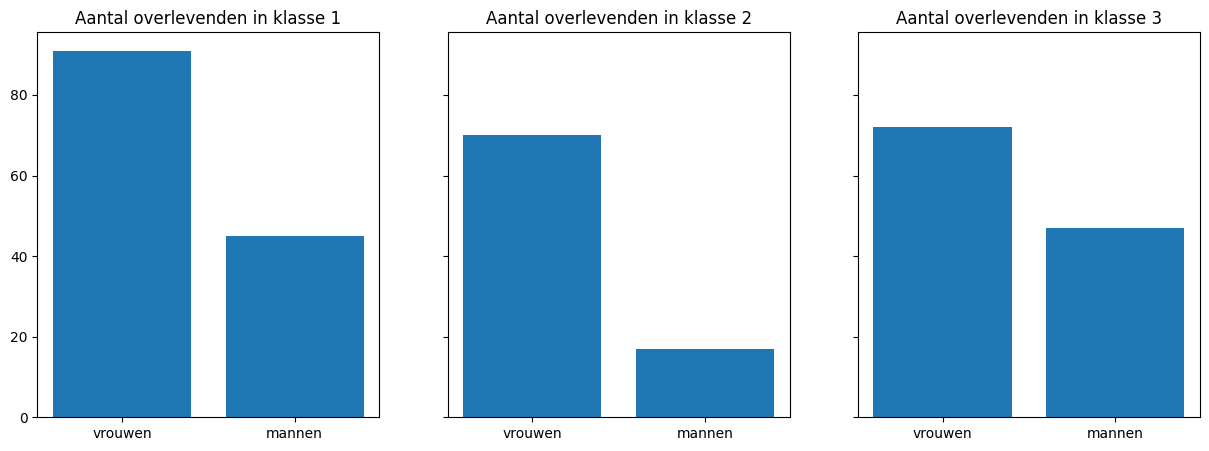

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
for klasse in range(3):
    ax[klasse].bar(["vrouwen", "mannen"], [vrouwen_overleefd[klasse],mannen_overleefd[klasse]])
    ax[klasse].set_title(f"Aantal overlevenden in klasse {klasse + 1}")
plt.show()